<div align="right">Python 3.6 Jupyter Notebook</div>

# Introduction to NetworkX

#### Notebook objectives
By the end of this notebook, you will be expected to:
> 
  - Create basic graphs using **NetworkX**;
  - Use **graph generators** to explore classic graphs;
  - Visualize graph objects; and
  - Compute neighborhood information from a NetworkX graph object.
  
####  List of exercises
> **Exercise 1**: Create and manipulate NetworkX graphs.

# Notebook introduction

This week, the practical assessments will focus on the study of networks. In this notebook, you will start with an introduction to NetworkX.

[NetworkX](https://networkx.github.io/)  is a Python language software package used to create, manipulate, and study the structure, dynamics, and function of complex networks. The first version of this software package was designed and written by Aric Hagberg, Dan Schult, and Pieter Swart between 2002 and 2003.

A network or graph is a set of vertices or nodes, with relationships between nodes represented by a set of lines. These lines can include arrows to depict a directional relationship.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate numerous types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

To access and use the NetworkX module functionality, it first needs to be imported into your notebook. 

Here are some additional links that will provide you with solid foundational knowledge of NetworkX:

- [NetworkX documentation](https://networkx.github.io/documentation/stable/)
- [NetworkX examples](https://networkx.github.io/documentation/latest/auto_examples/index.html?highlight=examples)
- [NetworkX tutorial](https://networkx.github.io/documentation/latest/tutorial.html)

<div class="alert alert-warning">
<b>Note</b>:<br>
It is strongly recommended that you save and checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.
</div>

#### Load libraries and set options

In [24]:
# Load relevant libraries.
import networkx as nx  
import matplotlib.pylab as plt
%matplotlib inline
from networkx.drawing.nx_agraph import pygraphviz_layout  as pgv
import graphviz
import random
from IPython.display import Image, display
import pydot
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 1. Graph creation
With NetworkX, graph objects can be created in one of three ways:

1. Adding edges and nodes explicitly.

2. Importing data from data sources.

3. Graph generators.

This notebook predominantly investigates graph exploration using the first approach, with a few remarks made on the other graph creation approaches.

### 1.1 Adding edges and nodes explicitly
First, create a graph object by explicitly adding nodes to said object.

#### 1.1.1 Instantiate an empty, undirected graph object

In [25]:
# Instantiate an empty network undirected graph object, and assign to variable G.
G = nx.Graph()

#### 1.1.2 Add nodes

In [26]:
# Add a node (1) to G.
G.add_node(1)

In [27]:
# Add another node ('x') to G.
G.add_node('x')

#### 1.1.3 Visualize the graph structure
A graph is an abstract mathematical object without a specific representation in the Cartesian coordinate space. Therefore, graph visualization is somewhat arbitrary. Notebook 2 will look at algorithms that have been proposed to aid in presenting graph objects. This notebook, however, will use a function - "pydot" - defined below, and which has some appealing aesthetics.

In [28]:
def pydot(G):
    '''
    A function for graph visualization using the dot framework
    '''
    pdot = nx.drawing.nx_pydot.to_pydot(G)
    display(Image(pdot.create_png()))

You can now visualize the simple graph that you have defined and populated with node information.

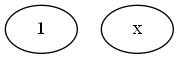

In [29]:
pydot(G)

#### 1.1.4 Use edge information to populate a graph object

Alternatively, you can populate node information by starting off from an edge pair or a list of edge pairs. Such a pairing may or may not include the strength, or other attributes, that describe the relationship between the pair(s). The special edge attribute "weight" should always be numerical, and holds values used by algorithms requiring weighted edges. When specifying edges as tuples, the optional third argument refers to the weight.

In [30]:
# Add an edge between two nodes, 1 and 3. 
# Note that nodes are automatically added if they do not exist.
G.add_edge(1,3)

In [31]:
# Add edge information, and specify the value of the weight attribute.
G.add_edge(2,'x',weight=0.9)
G.add_edge(1,'x',weight=3.142)
G.add_edge(1,'3',weight=4.2)

In [45]:
# Add edges from a list of tuples.
# In each tuple, the first 2 elements are nodes, and third element is value of the weight attribute. 
edgelist=[('a','b',5.0),('b','c',3.0),('a','c',1.0),('c','d',7.3),('d','e',2.3)] 
G.add_weighted_edges_from(edgelist)

#### 1.1.5 Graph visualization

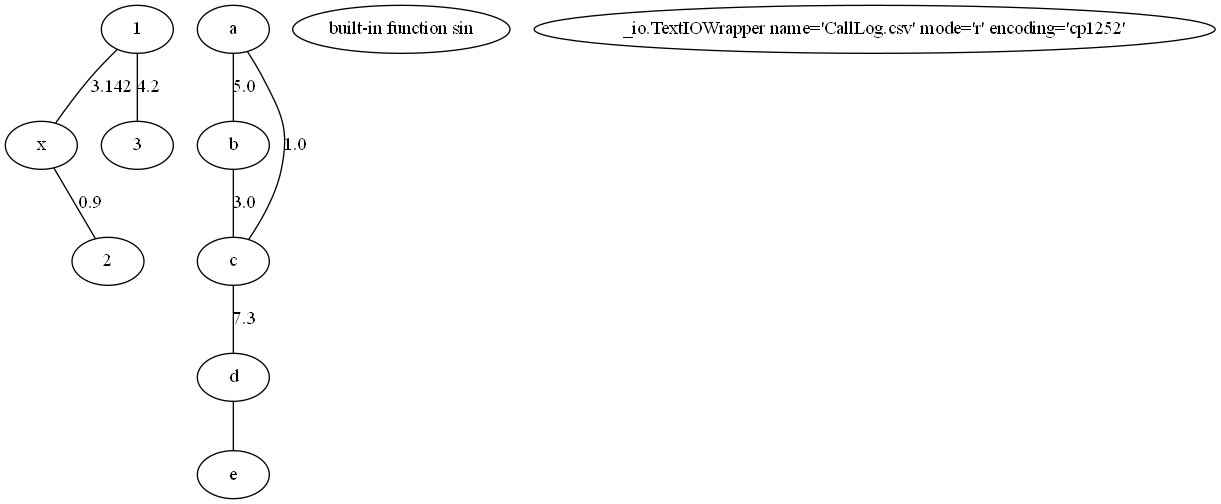

In [46]:
# Visualize the graph object.
pydot(G)

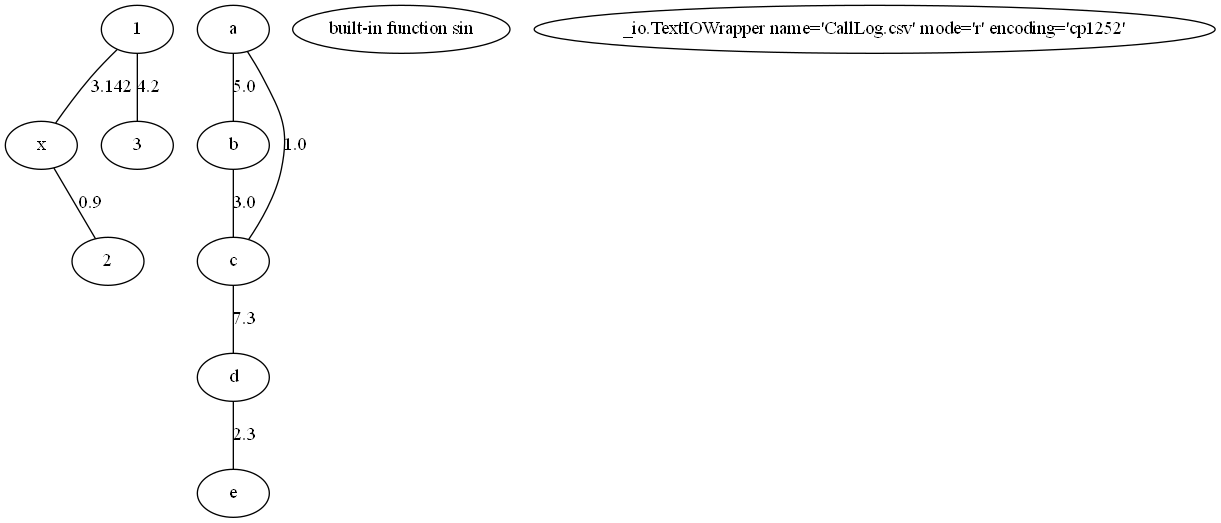

In [47]:
# Visualize the graph object, including weight information.
for u,v,d in G.edges(data=True):
    d['label'] = d.get('weight','')
pydot(G)

#### 1.1.6 A node can be any hashable object

A node can be any of the so-called [**hashable objects**](http://docs.python.org/2/glossary.html): 
> An object is hashable if it has a hash value that never changes during its lifetime (it needs a "_____hash_____()" method), and can be compared to other objects (it needs an "_____eq_____()" or "_____cmp_____()" method). Hashable objects that compare equal must have the same hash value.

> Hashability makes an object usable as a dictionary key and a set member, because these data structures use the hash value internally.

> While all of Python’s immutable built-in objects are hashable, no mutable containers (such as lists or dictionaries) are. Objects that are instances of user-defined classes are hashable by default; they all compare unequal, and their hash value is their id().

Examples of hashable objects in Python include strings, numbers, files, functions, etc.  In the following two examples, a node that is a math function and a node that is a file object are added to the graph object.

In [48]:
# Add a sine function, imported from the math module, as a node.
from math import sin
G.add_node(sin) 

In [51]:
# Add file handle object as node.
fh = open("CallLog.csv","r") # handle to file object.
G.add_node(fh)

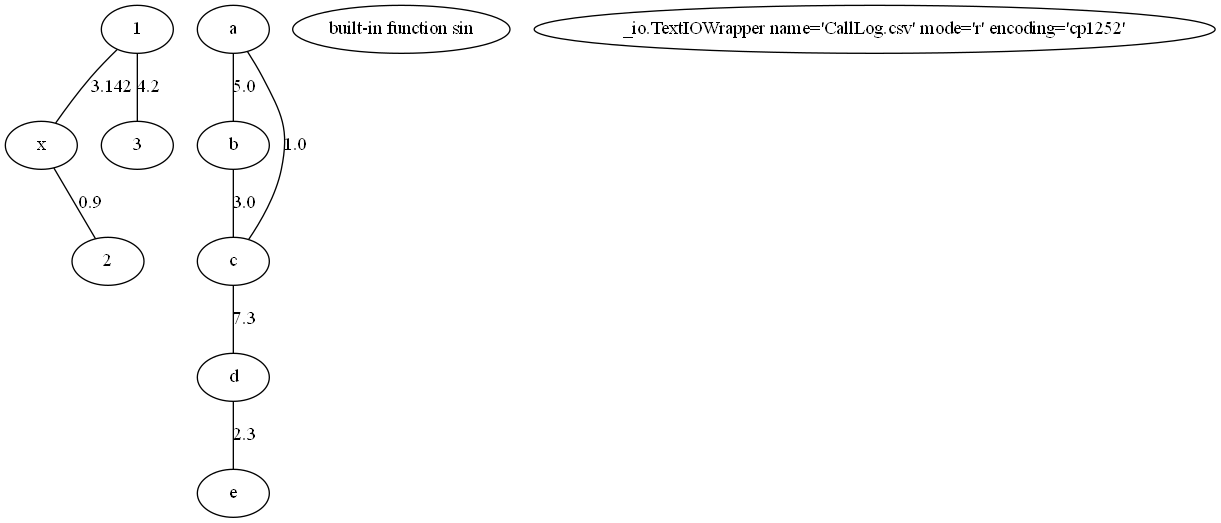

In [53]:
pydot(G)

### 1.2 Examining the `Graph()` object

You can examine the nodes and edges in your graph using various commands.

#### 1.2.1 Getting node information

In [52]:
# List the nodes in your graph object.
list(G.nodes())

[1,
 'x',
 3,
 2,
 '3',
 'a',
 'b',
 'c',
 'd',
 <function math.sin(x, /)>,
 <_io.TextIOWrapper name='CallLog.csv' mode='r' encoding='cp1252'>,
 'e',
 <_io.TextIOWrapper name='CallLog.csv' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='CallLog.csv' mode='r' encoding='cp1252'>]

In [40]:
# How many nodes are contained within your graph model?
G.number_of_nodes()

11

In [41]:
# Alternative method for getting the number nodes.
G.order()

11

#### 1.2.2 Getting edge information

In [54]:
# List the edges in the graph object.
list(G.edges())

[(1, 3),
 (1, 'x'),
 (1, '3'),
 ('x', 2),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'c'),
 ('c', 'd'),
 ('d', 'e')]

In [55]:
# How many edges do you have? 
G.number_of_edges()

9

In [56]:
# Alternative method for getting number of edges.
G.size()

9

#### 1.2.3 Getting edge weight information
The most direct way to get edge weight data is by using the "get_edge_data" method, which returns the attribute dictionary associated with an edge pairing.

In [58]:
for (u, v, wt) in G.edges.data('weight'):
    if wt != None:
        print('(%s, %s, %.3f)' % (u, v, wt))
    if wt is None:
        print(u,v, wt)

1 3 None
(1, x, 3.142)
(1, 3, 4.200)
(x, 2, 0.900)
(a, b, 5.000)
(a, c, 1.000)
(b, c, 3.000)
(c, d, 7.300)
(d, e, 2.300)


In the `dict` output, the label key was added above when you wanted to show weight attribute information when visualizing the graph. By default, it is not included when adding weight information to the edges. 

Print the weight information for all of the edges in your graph object.

In [21]:
for n1,n2,attr in G.edges(data=True):
         print(n1,n2,attr)

1 3 {'label': ''}
1 x {'weight': 3.142, 'label': 3.142}
1 3 {'weight': 4.2, 'label': 4.2}
x 2 {'weight': 0.9, 'label': 0.9}
a b {'weight': 5.0, 'label': 5.0}
a c {'weight': 1.0, 'label': 1.0}
b c {'weight': 3.0, 'label': 3.0}
c d {'weight': 7.3, 'label': 7.3}


#### 1.2.4 Getting neighbor information
It is also possible to get a list of the neighbors associated with a given node. In the following cell,  invoke the graph method "neighbors" and specify the node whose neighbors you are interested in.

In [22]:
list(G.neighbors('x'))

[2, 1]

You can also print the list of all nodes and their corresponding neighbors. The code below prints the node, and the node's neigbhors as list (that is, enclosed between two square brackets).

In [23]:
for node in G.nodes():
         print(node, list(G.neighbors(node)))

1 [3, 'x', '3']
x [2, 1]
3 [1]
2 ['x']
3 [1]
a ['b', 'c']
b ['a', 'c']
c ['b', 'a', 'd']
d ['c']
<built-in function sin> []
<_io.TextIOWrapper name='CallLog.csv' mode='r' encoding='utf-8'> []


#### 1.2.5 Removing nodes or edges 
Removing edges and nodes from a graph is very simple, and is illustrated in the following cell. 

In [59]:
# Add a set of edges from a list of tuples.
e = [(1 ,2) ,(1 ,3)]
G.add_edges_from(e)

In [60]:
# Remove edge (1,2).
G.remove_edge(1,2)

In [61]:
# Similarly, you can also remove a node, and all edges linked to that node will also fall away.
G.remove_node(3)

In [62]:
# Multiple edge or node removal is also possible.
G.remove_edges_from(e)

<div class="alert alert-danger">
**Important**: Removing a node not in the graph raises an error.
</div>

In [63]:
# Trying to remove a node not in the graph raises an error.
G.remove_node(3)

NetworkXError: The node 3 is not in the graph.

#### 1.2.6 Cleaning up

In [64]:
# Close the file handle object used above.
fh.close()

# Remove the graph object from the workspace.
del G

In [65]:
pydot(G)

NameError: name 'G' is not defined

## 1.3 Graph generators
NetworkX also has standard algorithms to create network topologies. The following cells include some examples that you are encouraged to build, analyze, and visualize, using the tools described above, as well as other tools that will be introduced later.

#### 1.3.1 Small, famous graphs

In [40]:
# Generate some of the small, famous graphs.
petersen=nx.petersen_graph()
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tet=nx.tetrahedral_graph()

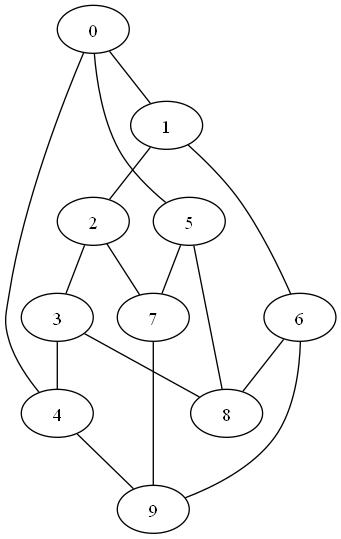

In [41]:
# Plot one of the small, famous graphs.
pydot(petersen)

In [67]:
# Alternative method for getting number of edges.
petersen.size()

NameError: name 'petersen' is not defined

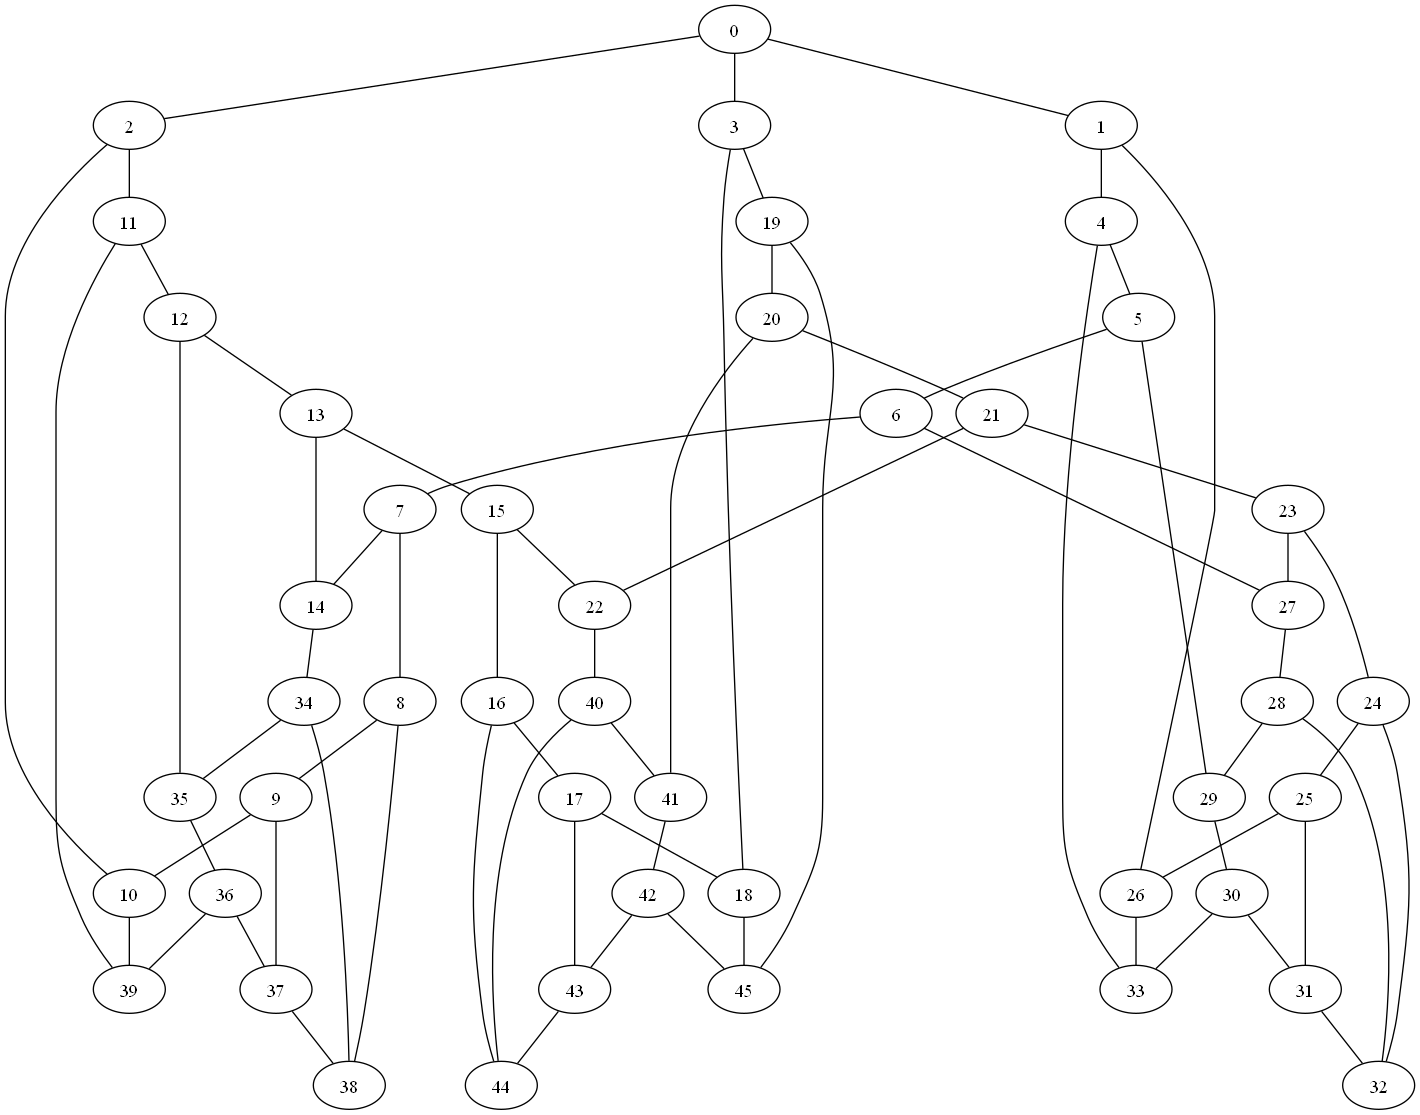

In [ ]:
pydot(tutte)

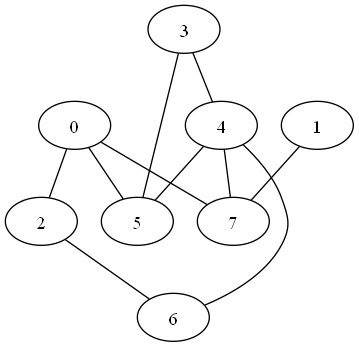

In [42]:
pydot(maze)

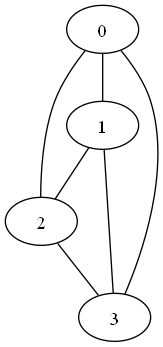

In [43]:
pydot(tet)

#### 1.3.2 Classic graphs

In [31]:
# Generate some classic graphs.
K_5=nx.complete_graph(5)
K_3_5=nx.complete_bipartite_graph(3,5)
barbell=nx.barbell_graph(10,10)
lollipop=nx.lollipop_graph(10,20)

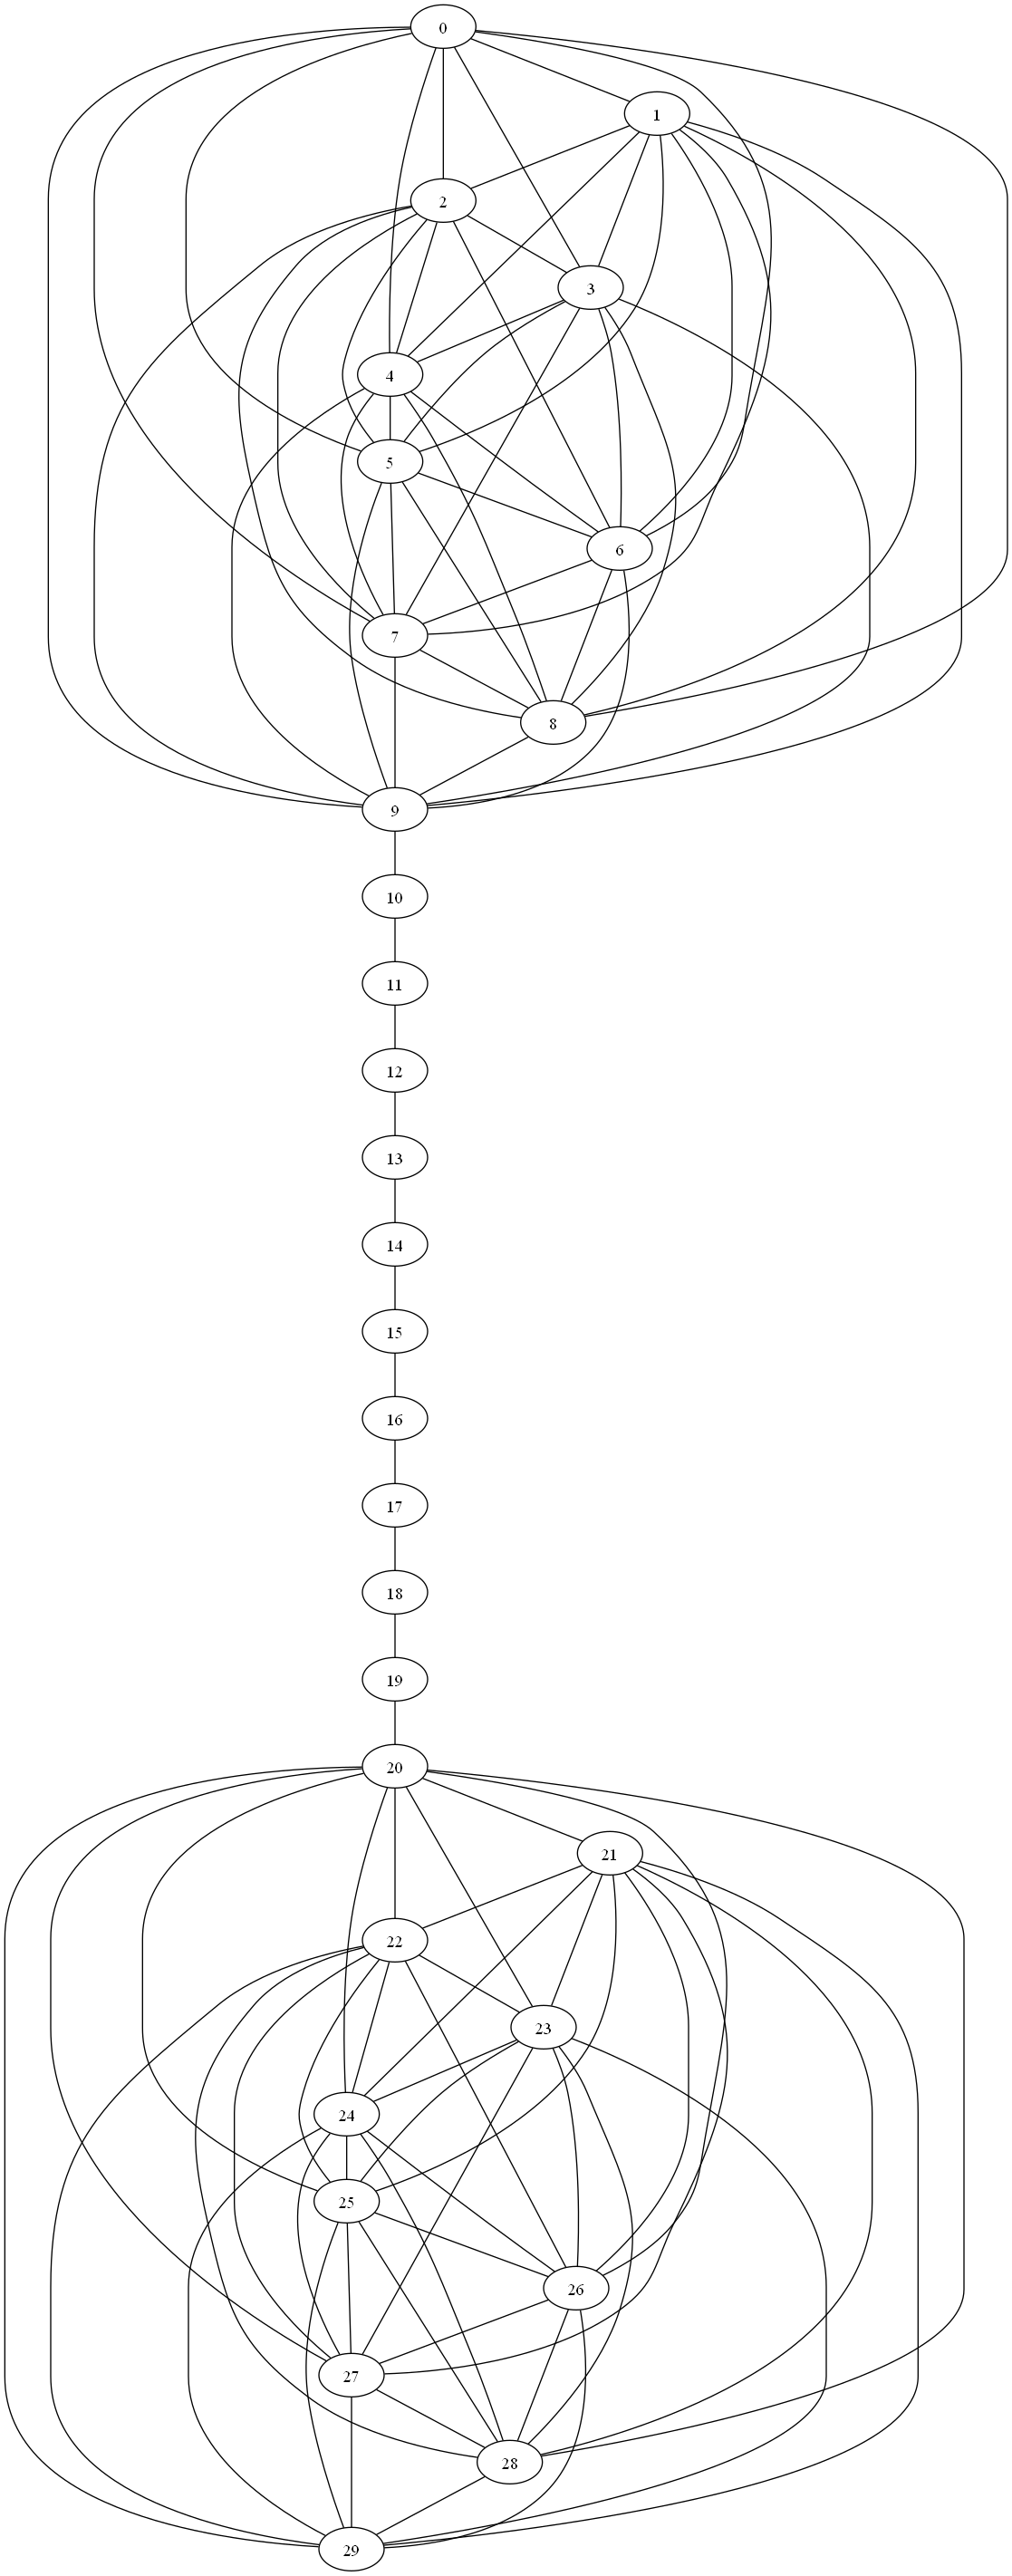

In [32]:
# Plot one of the classic graphs.
pydot(barbell)

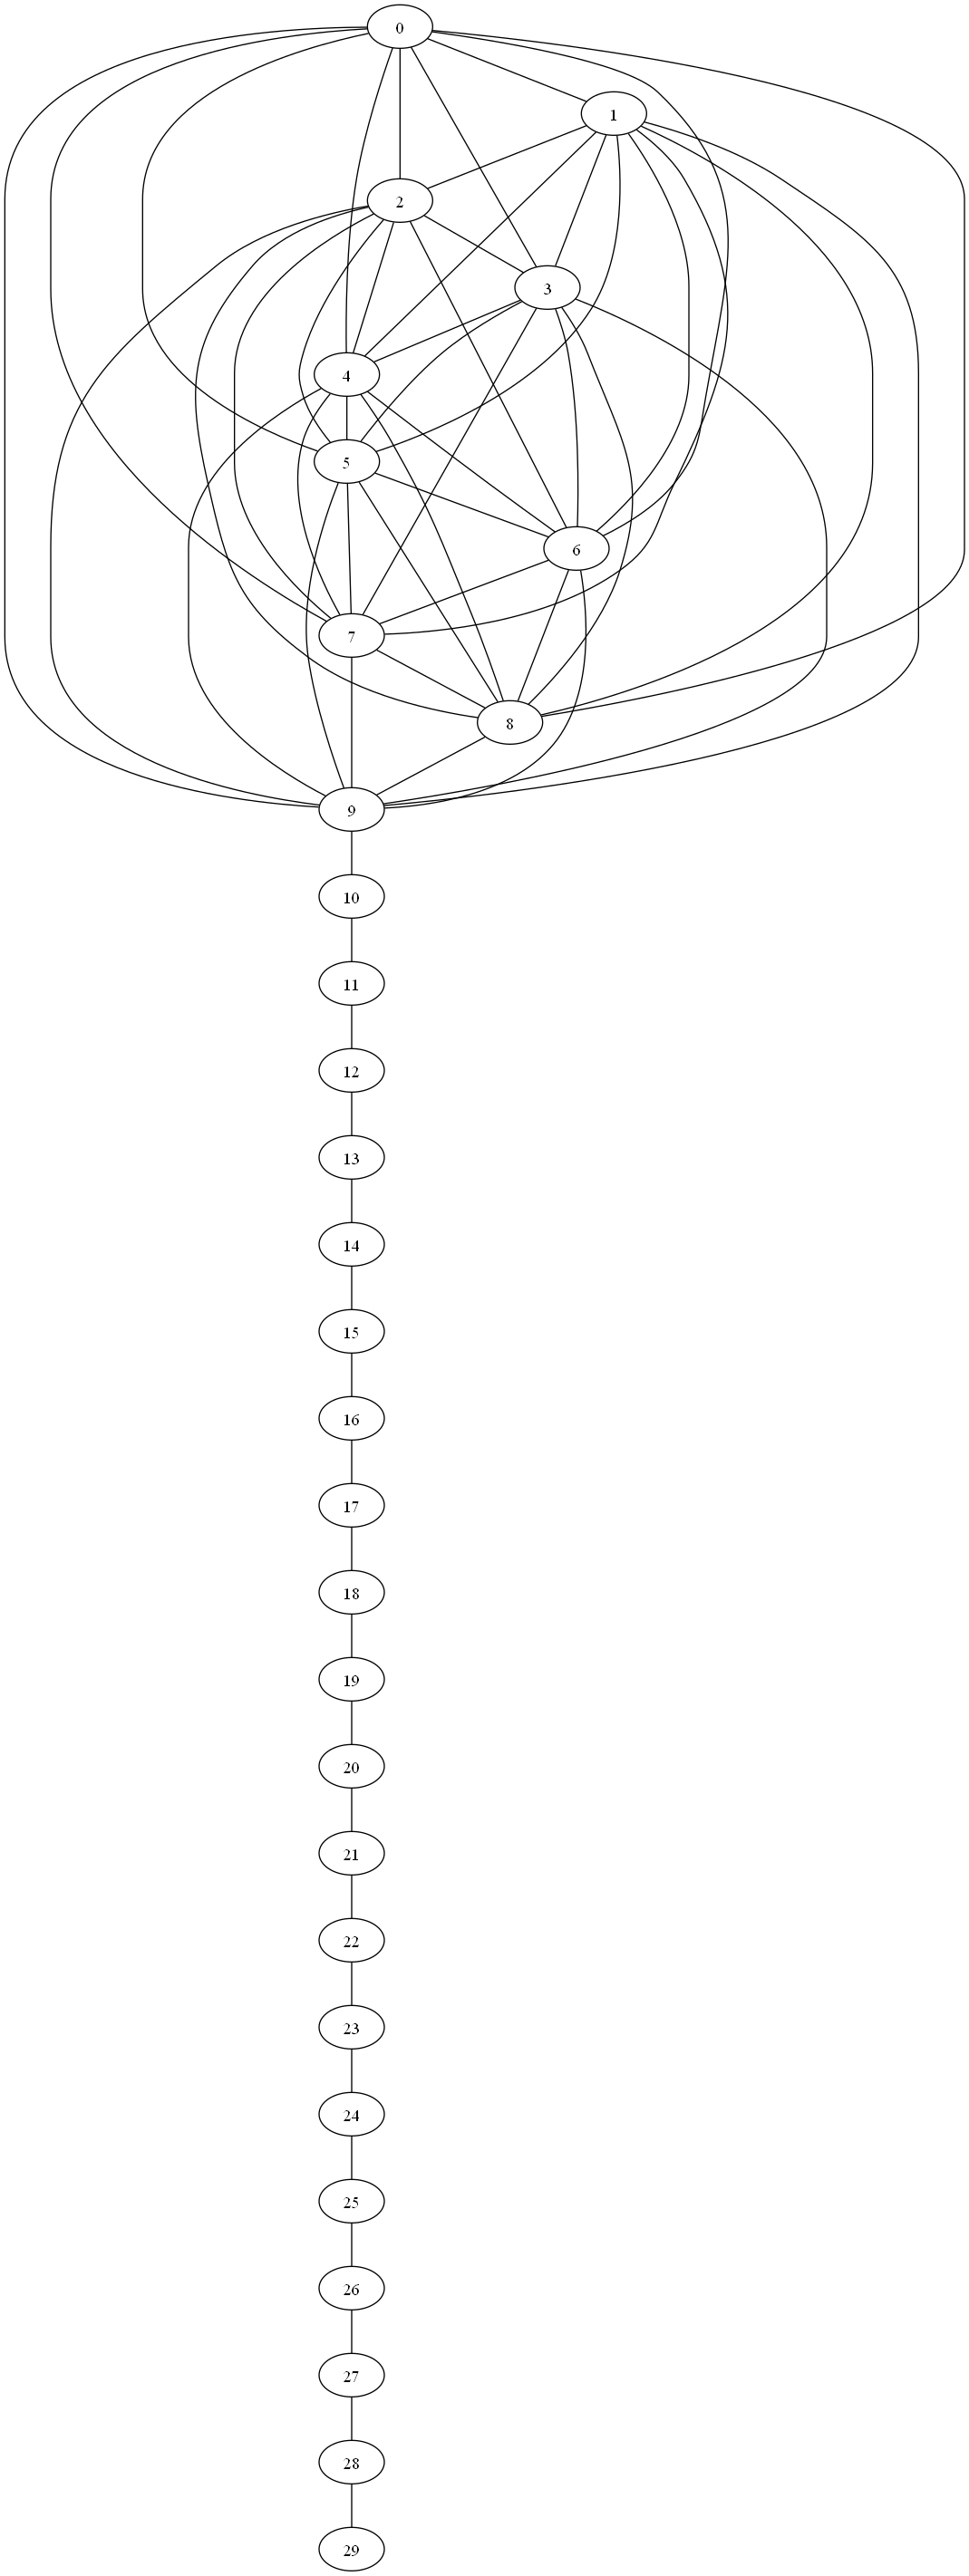

In [33]:
pydot(lollipop)

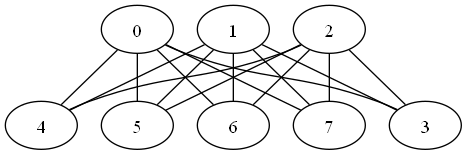

In [34]:
pydot(K_3_5)

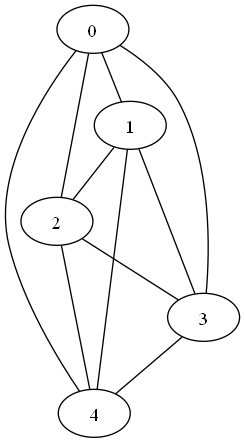

In [35]:
pydot(K_5)

#### 1.3.3 Random graphs

In [36]:
# Generate some random graphs for arbitrary parameter values.
er=nx.erdos_renyi_graph(10,0.15)
ws=nx.watts_strogatz_graph(30,3,0.1)
ba=nx.barabasi_albert_graph(10,5)
red=nx.random_lobster(20,0.9)

TypeError: random_lobster() missing 1 required positional argument: 'p2'

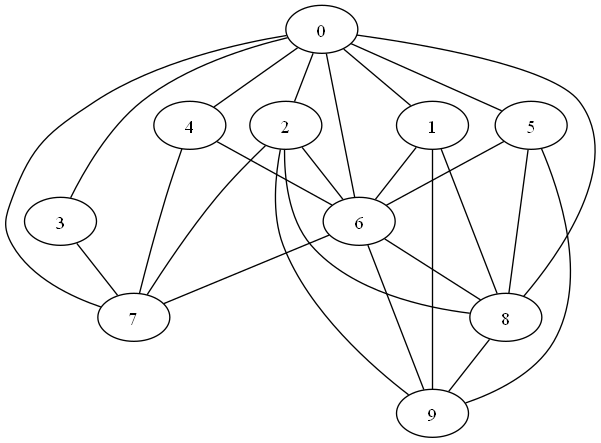

In [ ]:
# Plot one of the random graphs.
pydot(ba)

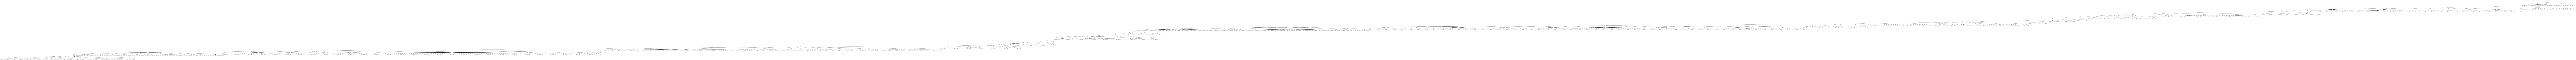

In [ ]:
# Plot one of the random graphs.
pydot(red)

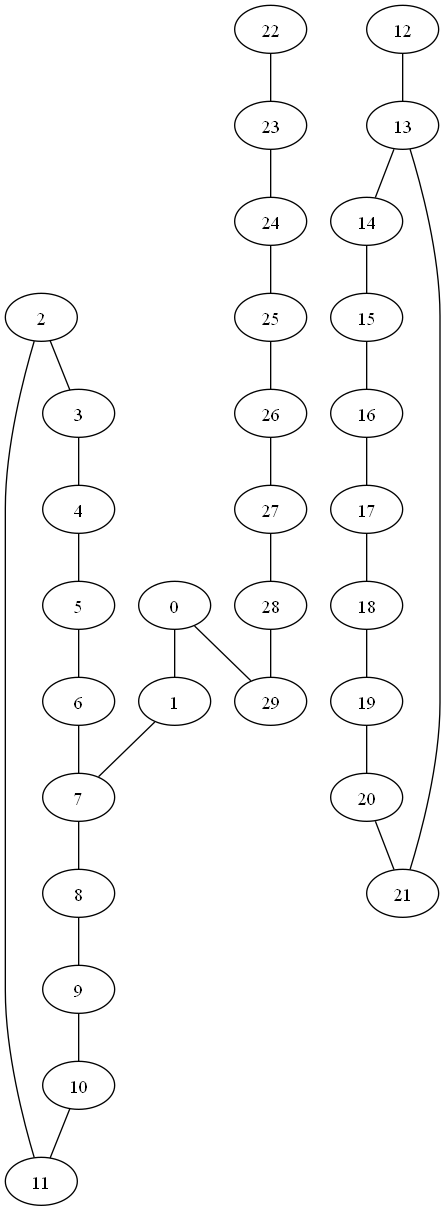

In [37]:
# Plot one of the random graphs.
pydot(ws)

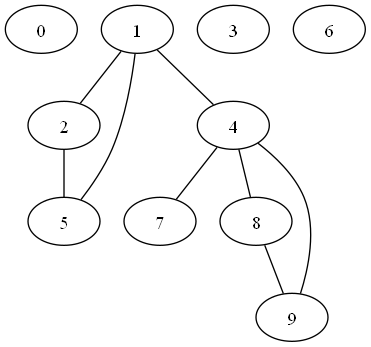

In [38]:
# Plot one of the random graphs.
pydot(er)

<br>
<div class="alert alert-info">
<b>Exercise 1 Start.</b>
</div>

> **Note**:

> This exercise contains five sections. It is broken up into these sections in order to make it easier to follow. Complete all five sections before saving and submitting your notebook.

### Exercise 1.1: Instructions

> Create an [**Erdos Renyi**](http://networkx.github.io/documentation/networkx-1.7/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph) random graph.
Your graph should have 30 nodes, where each of the edges are chosen with a probability of 0.15, using NetworkX's graph generator methods. Set the argument for the seed parameter to "``random.seed(10)``". Assign your graph to a variable "G".
>> **Hint**: 
An Erdos Renyi random graph is generated with NetworkX using the following: 

>>     G = nx.erdos_renyi_graph(nodes, probability, seed_value)

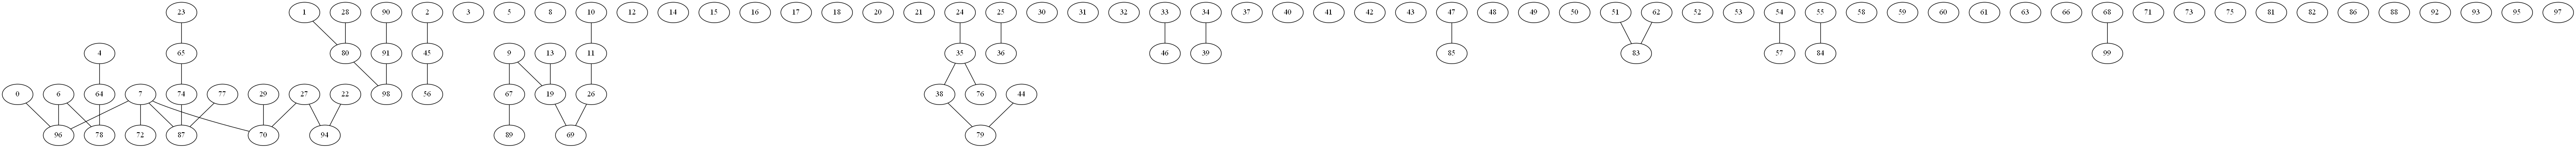

In [90]:
# Plot one of the Erdos Renyi Random graph.
Erdos = nx.erdos_renyi_graph(100, 0.01, 4)
pydot(Erdos)

### Exercise 1.2: Instructions
> Compute the number of edges in the graph, using one of the methods provided by NetworkX.

In [91]:
# How many edges do you have? 
Erdos.number_of_edges()

46

### Exercise 1.3: Instructions
> Write a piece of code that prints the nodel label and neighbors for each node in the graph "G" that you created. Your code should be reusable for other graph objects.

In [92]:
for E,R,attr in Erdos.edges(data=True):
         print(E,R,attr)

0 96 {}
1 80 {}
2 45 {}
4 64 {}
6 78 {}
6 96 {}
7 70 {}
7 72 {}
7 87 {}
7 96 {}
9 19 {}
9 67 {}
10 11 {}
11 26 {}
13 19 {}
19 69 {}
22 94 {}
23 65 {}
24 35 {}
25 36 {}
26 69 {}
27 70 {}
27 94 {}
28 80 {}
29 70 {}
33 46 {}
34 39 {}
35 38 {}
35 76 {}
38 79 {}
44 79 {}
45 56 {}
47 85 {}
51 83 {}
54 57 {}
55 84 {}
62 83 {}
64 78 {}
65 74 {}
67 89 {}
68 99 {}
74 87 {}
77 87 {}
80 98 {}
90 91 {}
91 98 {}


In [93]:
def print_node_neighbors(graph):
    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        for neighbor in neighbors:
            weight = graph[node][neighbor].get('weight', None)
            print(f"Node {node}, Neighbor {neighbor}, Weight: {weight}")


# Assign random weights to the edges
for u, v in Erdos.edges():
    weight = random.uniform(0.1, 1.0)
    Erdos[u][v]['weight'] = weight

print_node_neighbors(Erdos)


Node 0, Neighbor 96, Weight: 0.8423764366929752
Node 1, Neighbor 80, Weight: 0.6813592678398885
Node 2, Neighbor 45, Weight: 0.3219687004630887
Node 4, Neighbor 64, Weight: 0.4123382024113359
Node 6, Neighbor 78, Weight: 0.71435983491697
Node 6, Neighbor 96, Weight: 0.9792488081420355
Node 7, Neighbor 70, Weight: 0.4746006598660223
Node 7, Neighbor 72, Weight: 0.28289736337477084
Node 7, Neighbor 87, Weight: 0.5029547734915508
Node 7, Neighbor 96, Weight: 0.7629033065970293
Node 9, Neighbor 19, Weight: 0.4182296260654169
Node 9, Neighbor 67, Weight: 0.6106186834476416
Node 10, Neighbor 11, Weight: 0.806840364349658
Node 11, Neighbor 10, Weight: 0.806840364349658
Node 11, Neighbor 26, Weight: 0.5999440277268717
Node 13, Neighbor 19, Weight: 0.7850628189504132
Node 19, Neighbor 9, Weight: 0.4182296260654169
Node 19, Neighbor 13, Weight: 0.7850628189504132
Node 19, Neighbor 69, Weight: 0.37296364760026235
Node 22, Neighbor 94, Weight: 0.7580972116761052
Node 23, Neighbor 65, Weight: 0.469

### Exercise 1.4: Instructions
> Write code to find a node with the largest number of neighbors in the graph. Your code should print both the node label and the number of neighbors it has.

In [95]:
# Find the node with the largest number of neighbors
node_with_most_neighbors = max(Erdos.nodes(), key=lambda node: len(list(Erdos.neighbors(node))))

# Print the node with the largest number of neighbors
print("Node with the most neighbors:", node_with_most_neighbors)
print("Number of neighbors:", len(list(Erdos.neighbors(node_with_most_neighbors))))


Node with the most neighbors: 7
Number of neighbors: 4


### Exercise 1.5: Instructions
> Remove the node with the most neighbors (found in Exercise 1.4) from the graph. 

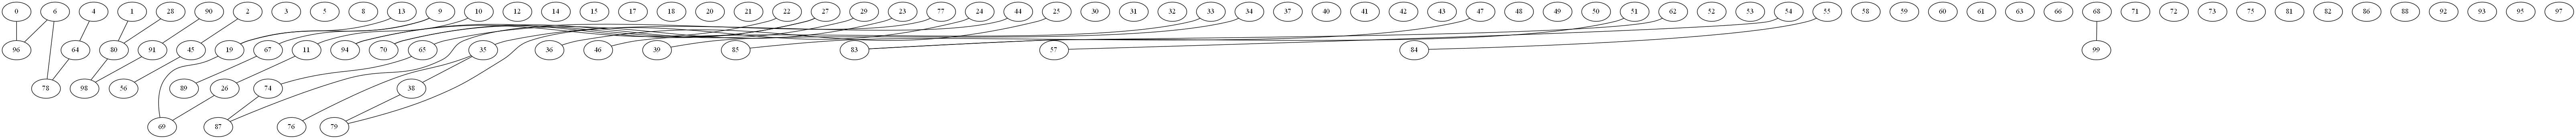

In [97]:
Erdos.remove_node(7)
pydot(Erdos)

<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".